In [1]:
import pandas as pd

In [2]:
google = pd.read_csv('http://netfondsbank.fi/quotes/posdump.php?paper=BEAR-GOOGLE-X3-C.NGM&csv_format=csv')
apple = pd.read_csv('http://netfondsbank.fi/quotes/posdump.php?paper=BEAR-APPLE-X3-C.NGM&csv_format=csv')

In [4]:
from datetime import datetime
google.index = [datetime.strptime(x,'%Y%m%dT%H%M%S') for x in google.time]
apple.index = [datetime.strptime(x,'%Y%m%dT%H%M%S') for x in apple.time]
google.drop('time',inplace=True,axis=1)
apple.drop('time',axis=1,inplace=True)

In [7]:
apple


,bid,bid_depth,bid_depth_total,offer,offer_depth,offer_depth_total
2017-08-11 08:00:00,0.000,0,0,0.00,0,0
2017-08-11 08:00:00,0.000,0,0,0.04,46800,46800
2017-08-11 09:00:49,0.016,10000,10000,0.04,46800,46800
2017-08-11 09:01:01,0.016,75000,75000,0.04,46800,46800
2017-08-11 09:08:09,0.009,75000,75000,0.04,46800,46800
2017-08-11 14:25:20,0.013,75000,75000,0.04,46800,46800
2017-08-11 15:30:00,0.021,75000,75000,0.04,46800,46800
2017-08-11 15:37:00,0.021,500000,500000,0.04,46800,46800


In [8]:
google

,bid,bid_depth,bid_depth_total,offer,offer_depth,offer_depth_total
2017-08-11 08:00:00,0.000,0,0,0,0,0
2017-08-11 09:00:50,0.325,10000,10000,0,0,0
2017-08-11 09:01:00,0.325,75000,75000,0,0,0
2017-08-11 09:08:20,0.293,75000,75000,0,0,0
2017-08-11 15:33:52,0.320,75000,75000,0,0,0
2017-08-11 15:37:00,0.320,500000,500000,0,0,0


In [11]:
%matplotlib inline
final_data = google.join(apple,lsuffix='_google',rsuffix='_apple',how='outer')[['bid_google','bid_apple']].fillna(method='backfill')
print final_data

                     bid_google  bid_apple
2017-08-11 08:00:00       0.000      0.000
2017-08-11 08:00:00       0.000      0.000
2017-08-11 09:00:49       0.325      0.016
2017-08-11 09:00:50       0.325      0.016
2017-08-11 09:01:00       0.325      0.016
2017-08-11 09:01:01       0.293      0.016
2017-08-11 09:08:09       0.293      0.009
2017-08-11 09:08:20       0.293      0.013
2017-08-11 14:25:20       0.320      0.013
2017-08-11 15:30:00       0.320      0.021
2017-08-11 15:33:52       0.320      0.021
2017-08-11 15:37:00       0.320      0.021


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008BFF7F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000008DDF080>], dtype=object)

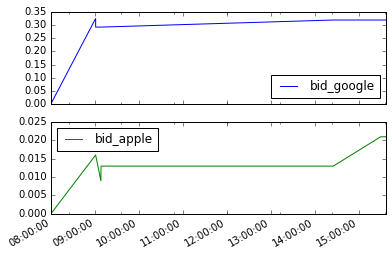

In [12]:
final_data.plot(subplots=True)

In [41]:
somestock = pd.read_csv('http://netfondsbank.fi/quotes/paperhistory.php?paper=E-SIED.BTSE&csv_format=csv')
somestock.index = [datetime.strptime(str(x),'%Y%m%d') for x in somestock.quote_date]
somestock.head()

,quote_date,paper,exch,open,high,low,close,volume,value
2017-08-11,20170811,E-SIED,BATS Europe,108.10,109.90,108.05,109.35,340554,37236564
2017-08-10,20170810,E-SIED,BATS Europe,110.40,110.45,108.50,108.65,380503,41601042
2017-08-09,20170809,E-SIED,BATS Europe,111.05,111.65,110.45,110.75,253863,28203624
2017-08-08,20170808,E-SIED,BATS Europe,111.35,112.50,110.90,112.05,269509,30112627
2017-08-07,20170807,E-SIED,BATS Europe,111.80,112.20,110.65,111.00,201132,22370947


In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
clf = DecisionTreeRegressor()

In [17]:
features,labels = somestock[somestock.columns.drop(['close','paper','exch'])],somestock['close']
train_features,test_features,train_labels,test_labels = train_test_split(features,labels)

In [18]:
clf.fit(train_features,train_labels)
clf.score(test_features,test_labels)

0.99639044636872864

## Wow... a 99.7% accuracy, I must have been rich now!!!

In [20]:
somestock = pd.read_csv('RELIANCE.NS.csv')
somestock.index = [datetime.strptime(str(x),'%Y-%m-%d') for x in somestock.Date]
print somestock.head()

somestock['prev_close']= somestock.Close.shift()
somestock['prev_open'] = somestock.Open.shift()
somestock['prev_high'] = somestock.High.shift()
somestock['prev_low'] = somestock.Low.shift()
somestock.fillna(method='backfill',inplace=True)

                  Date         Open         High          Low        Close  \
2017-07-14  2017-07-14  1520.000000  1536.000000  1515.550049  1533.750000   
2017-07-17  2017-07-17  1537.000000  1559.599976  1537.000000  1551.750000   
2017-07-18  2017-07-18  1546.800049  1551.800049  1511.000000  1519.900024   
2017-07-19  2017-07-19  1512.599976  1538.000000  1512.599976  1532.949951   
2017-07-20  2017-07-20  1539.750000  1550.000000  1523.699951  1528.900024   

              Adj Close   Volume  
2017-07-14  1533.750000  4693011  
2017-07-17  1551.750000  4285809  
2017-07-18  1519.900024  4489412  
2017-07-19  1532.949951  2695041  
2017-07-20  1528.900024  3114686  


In [21]:
somestock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,prev_close,prev_open,prev_high,prev_low
2017-07-14,2017-07-14,1520.000000,1536.000000,1515.550049,1533.750000,1533.750000,4693011,1533.750000,1520.000000,1536.000000,1515.550049
2017-07-17,2017-07-17,1537.000000,1559.599976,1537.000000,1551.750000,1551.750000,4285809,1533.750000,1520.000000,1536.000000,1515.550049
2017-07-18,2017-07-18,1546.800049,1551.800049,1511.000000,1519.900024,1519.900024,4489412,1551.750000,1537.000000,1559.599976,1537.000000
2017-07-19,2017-07-19,1512.599976,1538.000000,1512.599976,1532.949951,1532.949951,2695041,1519.900024,1546.800049,1551.800049,1511.000000
2017-07-20,2017-07-20,1539.750000,1550.000000,1523.699951,1528.900024,1528.900024,3114686,1532.949951,1512.599976,1538.000000,1512.599976


In [32]:

features,labels = somestock[['prev_open','prev_low','prev_high','prev_close']],somestock['Close']
train_features,test_features,train_labels,test_labels = train_test_split(features,labels)


In [34]:
clf.fit(train_features,train_labels)
clf.score(test_features,test_labels)

0.7218655678162903

In [35]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=1000)

In [36]:
clf.fit(train_features,train_labels)
clf.score(test_features,test_labels)

0.63354003713834239

In [37]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [38]:
clf.fit(train_features,train_labels)
clf.score(test_features,test_labels)

0.73783661441246895

In [48]:
a = ['BATS Europe','Some other','GER']
num_a = [0,1,2] # dict_a = {0:'BATS Europe', 1:'Some other',2:'GER'} ---> Label Encoding

EXCH
0
1
0

In [49]:
from sklearn.preprocessing import LabelEncoder
cls = LabelEncoder()
cls.fit(somestock.exch.unique())

LabelEncoder()

In [53]:
somestock['exch']= cls.transform(somestock.exch)

In [63]:
a = ['US','IND','GER']

In [68]:
from sklearn.preprocessing import LabelBinarizer
clf = LabelBinarizer()



In [73]:
clf.fit(somestock.paper.unique())

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [74]:
clf.classes_

array(['E-SIED'], 
      dtype='|S6')

In [75]:
new_cols  =  pd.DataFrame(clf.transform(somestock.paper))

In [78]:
new_cols.columns=['US']

In [80]:
new_cols.head()

,US
0,0
1,0
2,0
3,0
4,0
